###**Task 1: Implement a Fully Connected Neural Network and validate on the MNIST dataset** 

In [1]:
# Importing essential libraries
import numpy as np #for array operations
import tensorflow as tf #to import tensorflow interfaces
import matplotlib.pyplot as plt #for visualization
import keras
from keras.utils.np_utils import to_categorical
from keras.layers import Dense
from keras.models import Sequential

####**Loading the dataset**

In [2]:
# Loading dataset and performing train-test split
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
# Displaying the dimensions of the training and test set
print("Training data shape: ", x_train.shape)
print("Test data shape", x_test.shape)

Training data shape:  (60000, 28, 28)
Test data shape (10000, 28, 28)


As displayed, the training dataset has 60,000 images and test dataset has 10,000 images. Each image is of size 28x28 pixel.

####**Viewing a sample image from the dataset**

8


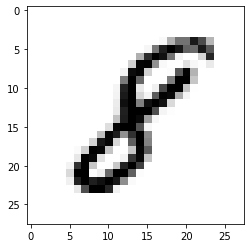

In [4]:
image_index = 7777
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')

For fully connected neural networks, the input data must be a vector. Instead of several 28x28 images, we consider several vectors that are all of length 784 (28*28=784). So, the images need to be flattened.

####**Preprocessing**

In [5]:
# Flatten the images
image_vector_size = 28*28
x_train = x_train.reshape(x_train.shape[0], image_vector_size)
x_test = x_test.reshape(x_test.shape[0], image_vector_size)

In [6]:
# Convert to "one-hot" vectors using the to_categorical function
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
print("First 5 training lables as one-hot encoded vectors:\n", y_train[:5])

First 5 training lables as one-hot encoded vectors:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


###**Building the Fully Connected Network**

In [7]:
image_size = 784 # 28*28
num_classes = 10 # ten unique digits

In [ ]:
model = Sequential()

# The input layer requires the special input_shape parameter which should match the shape of our training data.
model.add(Dense(units=32, activation='sigmoid', input_shape=(image_size,)))
model.add(Dense(units=num_classes, activation='softmax'))
model.summary()

 ### **Task 2: Training of model**

 Taken train test split as 70:30

In [9]:
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=128, epochs=5, validation_split=.3)

Epoch 1/5
329/329 [==============================] - 4s 4ms/step - loss: 1.5275 - accuracy: 0.6013 - val_loss: 1.1764 - val_accuracy: 0.7686
Epoch 2/5
329/329 [==============================] - 1s 3ms/step - loss: 0.9874 - accuracy: 0.7965 - val_loss: 0.8374 - val_accuracy: 0.8327
Epoch 3/5
329/329 [==============================] - 1s 3ms/step - loss: 0.7734 - accuracy: 0.8394 - val_loss: 0.6990 - val_accuracy: 0.8546
Epoch 4/5
329/329 [==============================] - 1s 3ms/step - loss: 0.6567 - accuracy: 0.8593 - val_loss: 0.6351 - val_accuracy: 0.8624
Epoch 5/5
329/329 [==============================] - 1s 3ms/step - loss: 0.5861 - accuracy: 0.8697 - val_loss: 0.5535 - val_accuracy: 0.8743


####**Visualization**

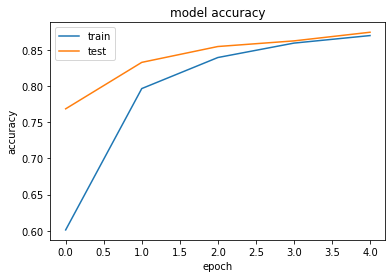

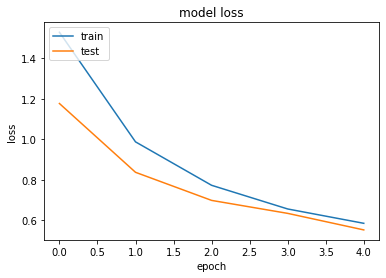

In [10]:
loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)
history.history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

####**Task 3: Evaluation of model**

In [11]:
score = model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.5446 - accuracy: 0.8788


In [12]:
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.5446190237998962
Test accuracy: 0.8787999749183655
